- https://youtu.be/Q_MbN-vu_2w?si=TrCYKV6q64rN6-Fq
- https://youtu.be/qBs29egdVNU?si=9X_UuFSqqsLBNndo
- https://youtu.be/cZ5w3b9ES7Q?si=NaiWh-SkPjqmKlmS

# [자전거 공유 수요](https://www.kaggle.com/competitions/bike-sharing-demand/overview)
워싱턴D.C 소재의 자전거 대여 스타트업의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표!!

## 평가지표 - RMSLE
Root Mean Squared Logarithmic Error

## [Data 설명](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=sampleSubmission.csv)

### Features

- datetime:  
  - hourly date + timestamp  
- season(계절):  
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
- holiday(휴일):  
  - whether the day is considered a holiday
- workingday(근무일):
  - whether the day is neither a weekend nor holiday
- weather(날씨):
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp(온도):
  - temperature in Celsius
- atemp(체감온도):
  - "feels like" temperature in Celsius
- humidity(습도):
  - relative humidity
- windspeed(풍속):
  - wind speed

### Target

- count:
  - 총 대여 수
  - number of total rentals

참고용
- casual:
  - 미등록 사용자 대여 개시 수
  - number of non-registered user rentals initiated
- registered:
  - 등록 사용자 대여 개시
  -  number of registered user rentals initiated

# Import Library

In [74]:
import os
import datetime

# 데이터 분석
import numpy as np
import pandas as pd
from scipy import stats

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcRarams['axes.unicode_minus'] = False



# 데이터 분리
from sklearn.model_selection import train_test_split


# warning
import warnings
warnings.filterwarnings('ignore')

## Connect to google account

In [75]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


# Global Variables

In [76]:
import easydict
import json
args = easydict.EasyDict()

# path
args.default_path = '/content/data/MyDrive/google_lecture/05. machine learning/Projects/kaggle/bike_sharing_demand/data/'
args.train_path = args.default_path+'train.csv'
args.test_path = args.default_path+'test.csv'
args.submission_path = args.default_path+'sampleSubmission.csv'

args.SEED = 42

# Load Data

## train data

In [77]:
train = pd.read_csv(args.train_path)

print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [78]:
train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


- 데이터 타입 확인

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 결측치 확인

In [80]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## test data

In [81]:
test = pd.read_csv(args.test_path)

print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [82]:
test.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [84]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## submission data

In [85]:
submission = pd.read_csv(args.submission_path)

print(submission.shape)
submission.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


## 데이터 타입 변경

In [86]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## datetime 변수 생성

In [88]:
print(f'before: {train.shape} / {test.shape}')

for data in [train, test]:
  data['year'] = data['datetime'].dt.year # 년도
  data['month'] = data['datetime'].dt.month # 월
  data['day'] = data['datetime'].dt.day # 일
  data['dayofweek'] = data['datetime'].dt.dayofweek # 요일
  data['quarter'] = data['datetime'].dt.quarter # 분기
  data['hour'] = data['datetime'].dt.hour # 시간
  data['minute'] = data['datetime'].dt.minute # 분
  data['second'] = data['datetime'].dt.second # 초

  data['weekend'] = data['dayofweek'].apply(lambda x: int(x in [5,6]))

print(f'after: {train.shape} / {test.shape}')

before: (10886, 12) / (6493, 9)
after: (10886, 21) / (6493, 18)


# EDA

## 날짜

<Axes: xlabel='year', ylabel='count'>

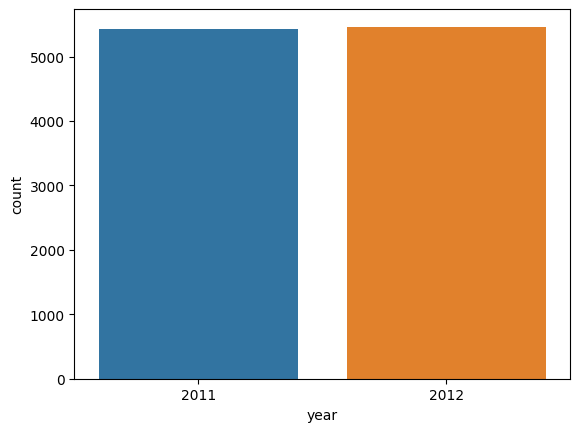

In [89]:
# 연도별 데이터량 확인
sns.countplot(x='year', data=train)

In [90]:
# 월별 평균 온도
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


<Axes: xlabel='month'>

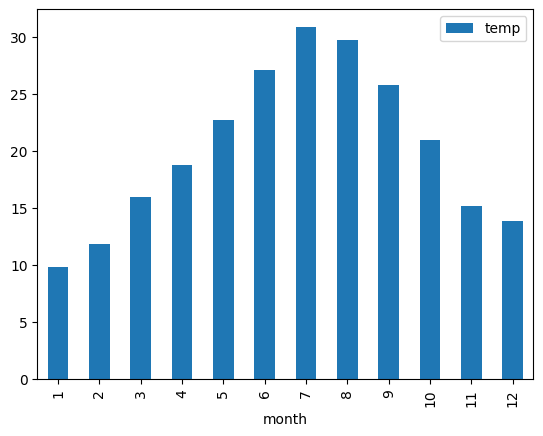

In [91]:
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')

<Axes: xlabel='month'>

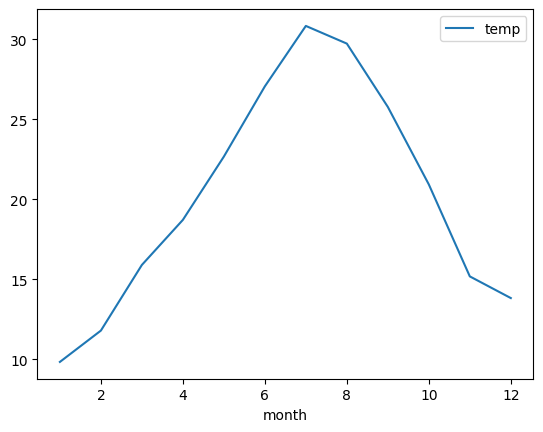

In [92]:
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='line')

<Axes: xlabel='month', ylabel='temp'>

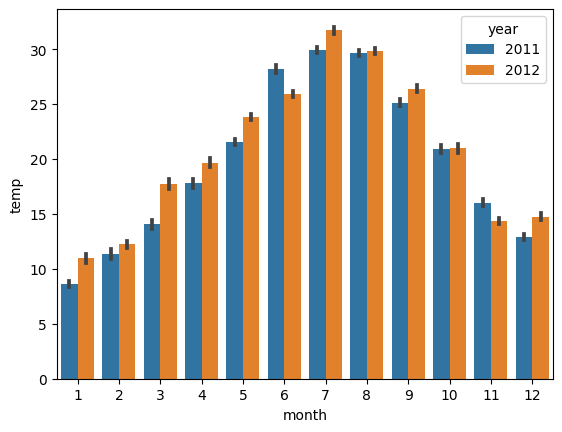

In [93]:
sns.barplot(x='month', y='temp', hue='year', data=train)

<Axes: xlabel='month', ylabel='count'>

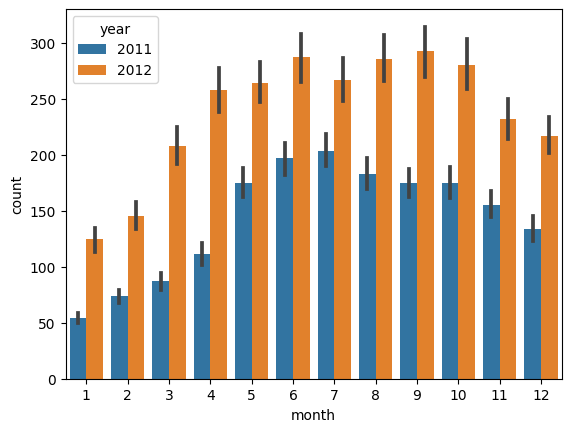

In [94]:
sns.barplot(x='month', y='count', hue='year', data=train)

In [95]:
train['quarter'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: quarter, dtype: int64

In [96]:
train['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [97]:
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [98]:
train['second'].value_counts()

0    10886
Name: second, dtype: int64

In [99]:
print(f'before: {train.shape} / {test.shape}')

train = train.drop(['minute', 'second'], axis=1)
test = test.drop(['minute', 'second'], axis=1)

print(f'after: {train.shape} / {test.shape}')

before: (10886, 21) / (6493, 18)
after: (10886, 19) / (6493, 16)


<Axes: xlabel='dayofweek', ylabel='count'>

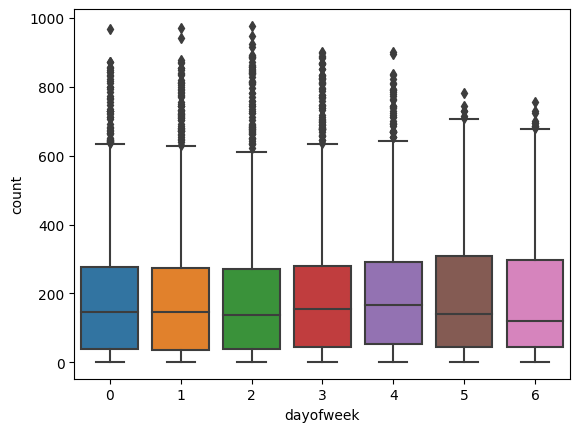

In [100]:
sns.boxplot(x='dayofweek', y='count', data=train)

<Axes: xlabel='dayofweek', ylabel='count'>

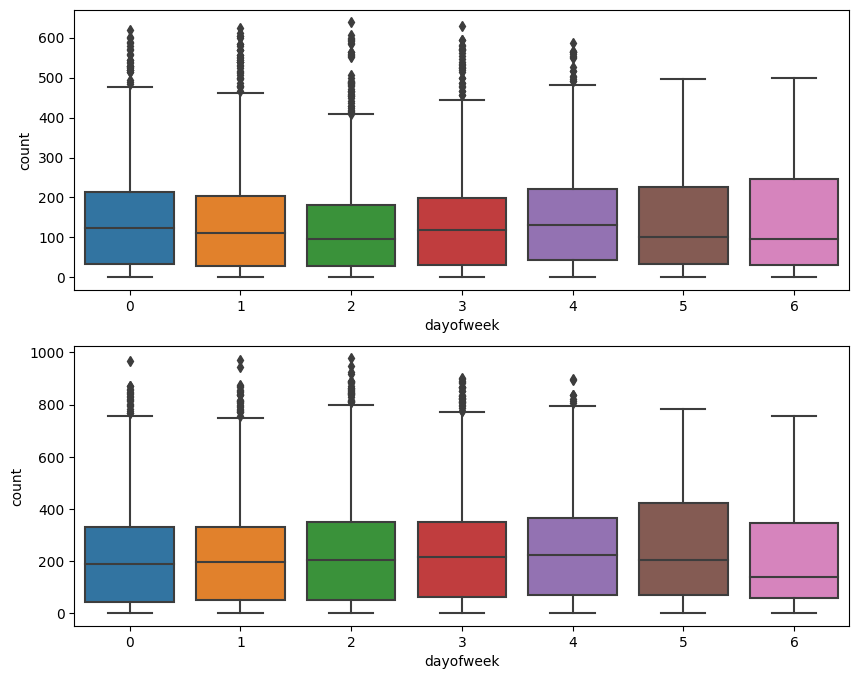

In [101]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(10,8)

sns.boxplot(x='dayofweek', y='count', data=train.loc[train['year']==2011], ax=axes[0])
sns.boxplot(x='dayofweek', y='count', data=train.loc[train['year']==2012], ax=axes[1])

<Axes: xlabel='hour', ylabel='registered'>

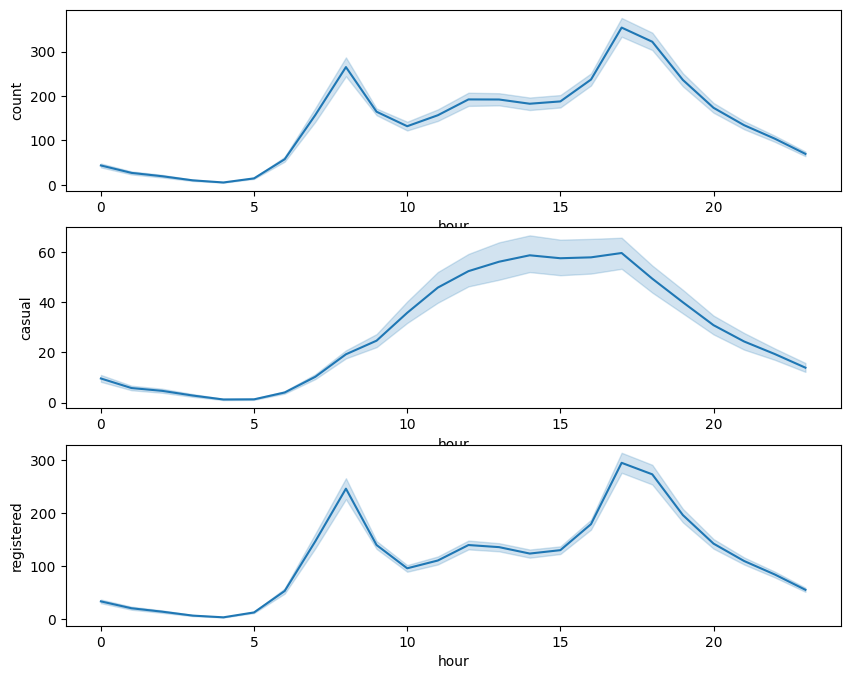

In [102]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(10,8)

sns.lineplot(x='hour', y='count', data=train.loc[train['year']==2011], ax=axes[0])
sns.lineplot(x='hour', y='casual', data=train.loc[train['year']==2011], ax=axes[1])
sns.lineplot(x='hour', y='registered', data=train.loc[train['year']==2011], ax=axes[2])

<Axes: xlabel='hour', ylabel='count'>

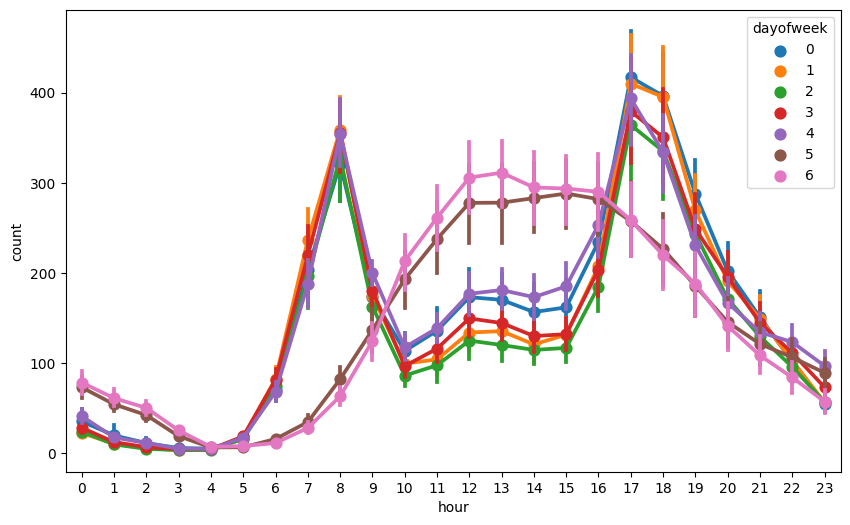

In [103]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='count', hue='dayofweek', data=train.loc[train['year']==2011])

<Axes: xlabel='hour', ylabel='count'>

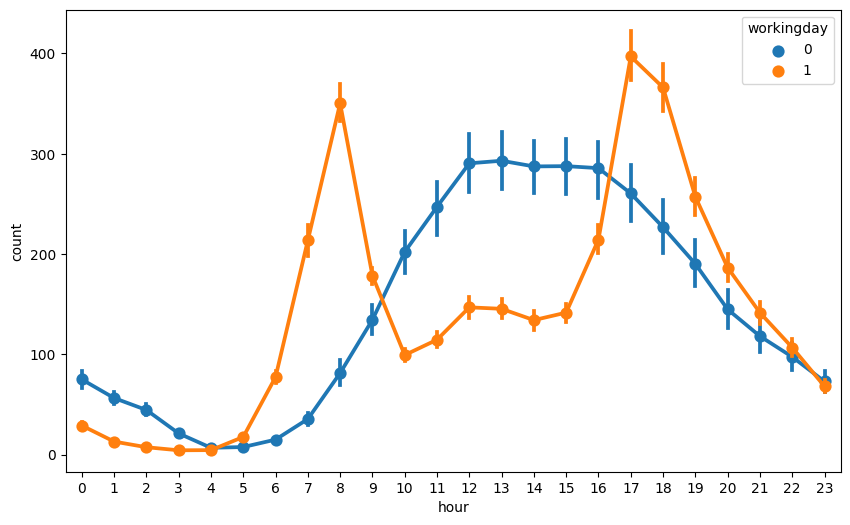

In [104]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='count', hue='workingday', data=train.loc[train['year']==2011])

<Axes: xlabel='hour', ylabel='count'>

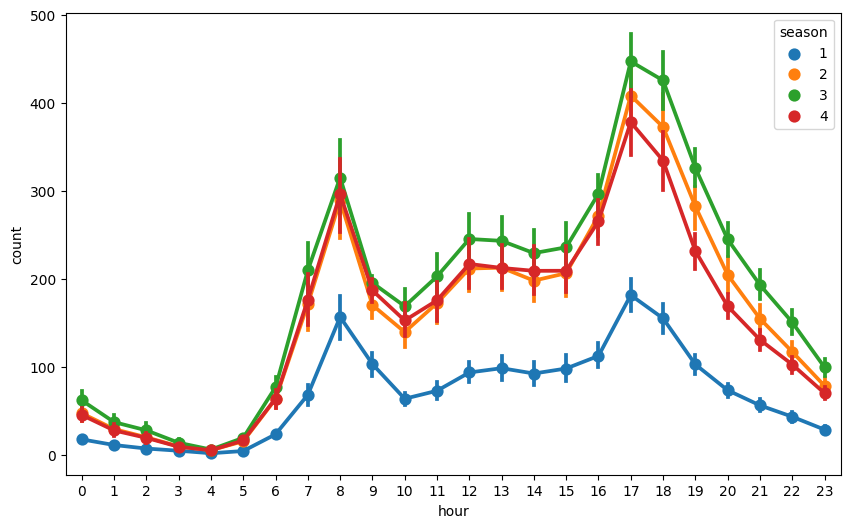

In [105]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='count', hue='season', data=train.loc[train['year']==2011])

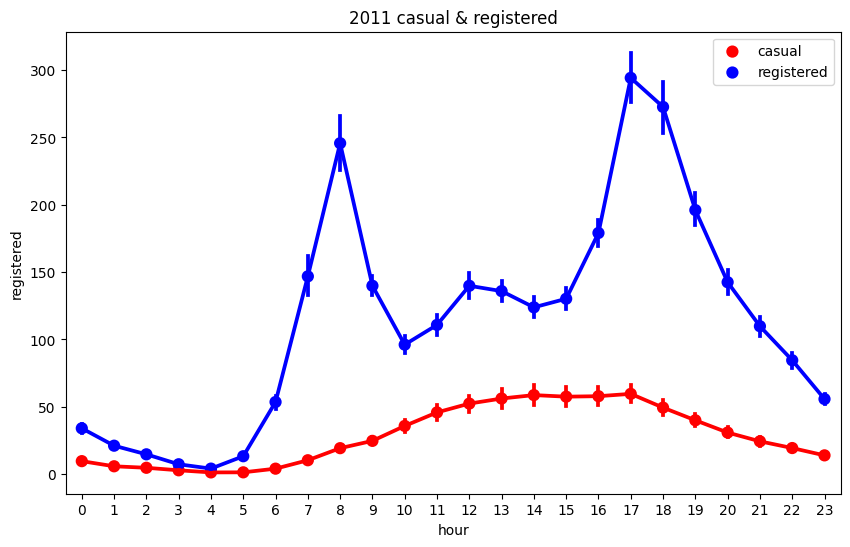

In [109]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='casual', data=train.loc[train['year']==2011], color='red', label='casual')
sns.pointplot(x='hour', y='registered', data=train.loc[train['year']==2011], color='blue', label='registered')
plt.title('2011 casual & registered')
plt.legend()

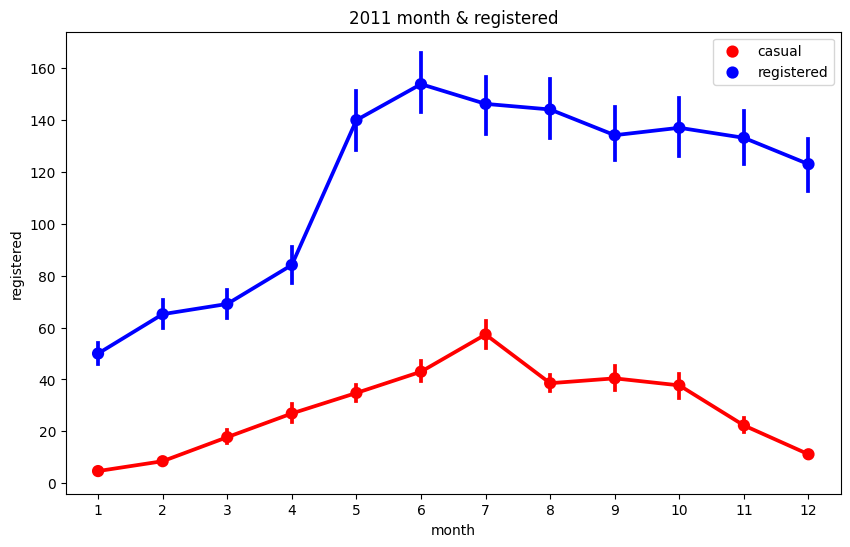

In [110]:
plt.figure(figsize=(10,6))
sns.pointplot(x='month', y='casual', data=train.loc[train['year']==2011], color='red', label='casual')
sns.pointplot(x='month', y='registered', data=train.loc[train['year']==2011], color='blue', label='registered')
plt.title('2011 month & registered')
plt.legend()

## 상관관계

다중공선성 문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.  

해결방법
  - 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거
  - 변수를 변환

In [111]:
# 피어슨 상관관계
train[['temp', 'atemp', 'weather', 'count', 'casual', 'registered']].corr()

,temp,atemp,weather,count,casual,registered
temp,1.000000,0.984948,-0.055035,0.394454,0.467097,0.318571
atemp,0.984948,1.000000,-0.055376,0.389784,0.462067,0.314635
weather,-0.055035,-0.055376,1.000000,-0.128655,-0.135918,-0.109340
count,0.394454,0.389784,-0.128655,1.000000,0.690414,0.970948
casual,0.467097,0.462067,-0.135918,0.690414,1.000000,0.497250
registered,0.318571,0.314635,-0.109340,0.970948,0.497250,1.000000


<Axes: >

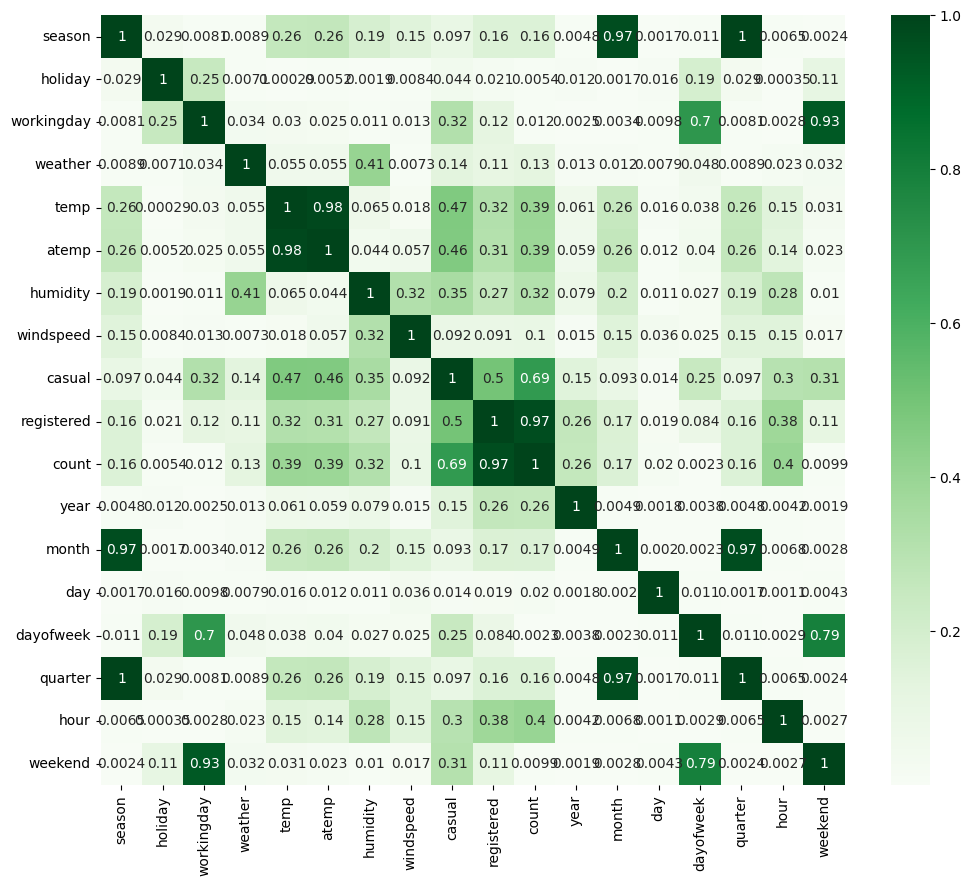

In [114]:
plt.figure(figsize=(12,10))

sns.heatmap(abs(train.corr()), annot=True, cmap='Greens')

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=1, random_state=args.SEED)
train_tmp = pca.fit_transform(train[['temp', 'atemp']])
test_tmp = pca.transform(test[['temp', 'atemp']])

In [117]:
train = train.drop(['temp', 'atemp'], axis=1)
test = test.drop(['temp', 'atemp'], axis=1)

train['temp_pca'] = train_tmp
test['temp_pca'] = test_tmp

In [118]:
train.head(2)

,datetime,season,holiday,workingday,weather,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,weekend,temp_pca
0,2011-01-01 00:00:00,1,0,0,1,81,0.0,3,13,16,2011,1,1,5,1,0,1,13.848653
1,2011-01-01 01:00:00,1,0,0,1,80,0.0,8,32,40,2011,1,1,5,1,1,1,14.963061


In [119]:
pd.DataFrame(abs(train.corr())['count'].sort_values(ascending=False))

,count
count,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
temp_pca,0.393394
humidity,0.317371
year,0.260403
month,0.166862
quarter,0.163439
season,0.163439


<Axes: >

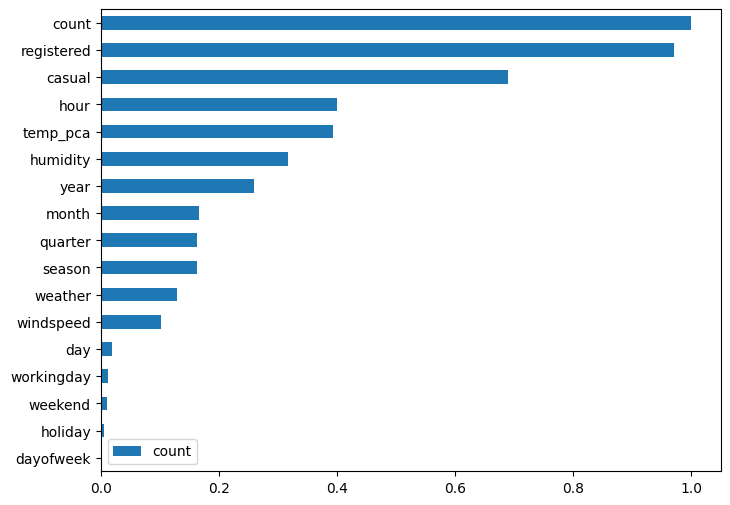

In [121]:
pd.DataFrame(abs(train.corr())['count'].sort_values(ascending=True)).plot(kind='barh', figsize=(8,6))